# Calcul NODU
Utilisation des DU 'exploitables' et de la base BNVD pour calculer les NODU. Valeurs 'officielles' [ici](https://agriculture.gouv.fr/indicateurs-des-ventes-de-produits-phytosanitaires-le-gouvernement-rend-public-les-donnees-relatives)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Chargement des données
France entière dans un premier temps, ce sera facile de décliner par CP par la suite

In [2]:
fichier_bnvd = r'./donnees/bnvd/BNVD_2020_ACHAT_2015/BNVD_2020_ACHAT_FR_SUBSTANCE_2015.csv'
donnees_bnvd = pd.read_csv(fichier_bnvd,sep=';')
donnees_bnvd

annee      amm                             substance          cas  \
0      2015  1030003  polymere carboxyl sulfone cationique    8061-53-8   
1      2015  2000001                            glyphosate    1071-83-6   
2      2015  2000003                          metazachlore   67129-08-2   
3      2015  2000010                          oxyfluorfene   42874-03-3   
4      2015  2000010                           propyzamide   23950-58-5   
...     ...      ...                                   ...          ...   
4017   2015  9900444                            fluroxypyr   69377-81-7   
4018   2015  9900446                             cymoxanil   57966-95-7   
4019   2015  9900446                           fludioxonil  131341-86-1   
4020   2015  9900446                           metalaxyl-m   70630-17-0   
4021   2015  9900452               lactobacillus plantarum          NaN   

      quantite_substance classification  classification_mention achat_etranger  
0            2936.251080          Autre                     NaN            Non  
1             178.380000    N Organique                     NaN            Non  
2           39793.650000     T, T+, CMR                     NaN            Non  
3             471.280000    N Organique                     NaN            Non  
4             368.080000     T, T+, CMR                     NaN            Non  
...                  ...            ...                     ...            ...  
4017           69.000000    N Organique                     NaN            Non  
4018         9043.150010    N Organique                     NaN            Oui  
4019         4521.575005    N Organique                     NaN            Oui  
4020        15337.182377          Autre                     NaN            Oui  
4021                 NaN          Autre                     NaN            Non  

[4022 rows x 8 columns]

In [3]:
fichier_DU = r'./donnees/utf 8 Annexe 5 arr t DU 27 avril 2017.csv'
donnees_DU = pd.read_csv(fichier_DU, sep=';', header=3, names=['substance','2011','2012','2013','2014','2015'], na_values='-',encoding='latin1')
for col in ['2011','2012','2013','2014','2015']:
    donnees_DU[col] = donnees_DU[col].str.replace(',','.').astype('float64')
donnees_DU

substance        2011        2012        2013  \
0                        1-decanol         NaN   13.700000   13.700000   
1              1,3-dichloropropène  376.344736  377.957746  376.113422   
2           2,4-d (ester amylique)    0.388912    0.388539    0.388395   
3    2,4-d (ester de butyl glycol)    1.160000    1.160000    1.160000   
4          2,4-d (ester ethylique)    3.600000    0.232000    0.232000   
..                             ...         ...         ...         ...   
418              Zetacypermethrine    0.020139    0.020211    0.043596   
419                         Zinèbe    2.628247    2.631504    2.627800   
420                           Zinc    0.340000    0.340000    0.340000   
421                         Zirame    1.900000    1.900000    1.900000   
422                       Zoxamide    0.127485    0.127386    0.127556   

           2014        2015  
0     13.700000   13.700000  
1    474.612613  475.115093  
2      0.387632    0.386721  
3      1.160000    1.160000  
4      0.232000    0.232000  
..          ...         ...  
418    0.042790    0.041527  
419    2.623140    2.623140  
420    0.340000    0.340000  
421    1.900000    1.900000  
422    0.148640    0.148650  

[423 rows x 6 columns]

## Exploration des données

On regarde si on arrive à faire correspondre les substances entre les deux jeux de données

In [4]:
len(donnees_DU['substance'].tolist())

423

In [5]:
len(donnees_bnvd['substance'].tolist())

4022

In [6]:
len(donnees_bnvd['substance'].unique().tolist())

491

In [7]:
substance_a_tester = 'cuivre'
liste_substances_DU = donnees_DU['substance'].tolist()
liste_substance_test_DU = donnees_DU[[substance_a_tester in subst.lower() for subst in liste_substances_DU]]['substance'].tolist()
liste_substance_test_DU

['Cuivre',
 "Cuivre de l'hydroxyde de cuivre",
 "Cuivre de l'oxychlorure de cuivre",
 "Cuivre de l'oxyde cuivreux",
 'Cuivre du carbonate de cuivre',
 'Cuivre du sulfate',
 'Cuivre du sulfate tetracuivrique et tricalcique',
 'Sulfate de cuivre tribasique']

In [8]:
liste_substances_bnvd = donnees_bnvd['substance'].tolist()
liste_substance_test_bnvd = donnees_bnvd[[substance_a_tester in subst.lower() for subst in liste_substances_bnvd]]['substance'].unique().tolist()
liste_substance_test_bnvd

["cuivre de l'hydroxyde de cuivre",
 'cuivre du sulfate de cuivre',
 "cuivre de l'oxychlorure de cuivre",
 "cuivre de l'oxyde cuivreux",
 'cuivre du sulfate tribasique',
 'cuivre du tallate de cuivre',
 'cuivre du sulfate tetracuivrique et tricalcique']

## Nettoyage
On essaye de faire un peu de propre pour que les noms des substances correspondent

In [9]:
def nettoyage_chaine_caracteres(s):
    s = s.lower()
    remplacements = {
        'é':'e',
        'è':'e',
        'ê':'e',
        'à':'a'
    }
    for char in remplacements.keys():
        s = s.replace(char,remplacements[char])
    return s

In [10]:
for index, row in donnees_bnvd.iterrows():
    donnees_bnvd.at[index,'substance'] = nettoyage_chaine_caracteres(donnees_bnvd.at[index,'substance'])

for index, row in donnees_DU.iterrows():
    donnees_DU.at[index,'substance'] = nettoyage_chaine_caracteres(donnees_DU.at[index,'substance'])

liste_substances_bnvd = donnees_bnvd['substance'].unique().tolist()
liste_substances_DU = donnees_DU['substance'].tolist()

sorted(liste_substances_DU)

['1,3-dichloropropene',
 '1-decanol',
 '2,4-d (ester amylique)',
 '2,4-d (ester de butyl glycol)',
 '2,4-d (ester ethylique)',
 '2,4-d (ester isobutylique)',
 "2,4-d (sel d'amine)",
 '2,4-d (sel de dimethylamine)',
 '2,4-d (sel de tri isopropanol amine)',
 '2,4-db',
 '2,4-db (sel de sodium)',
 '2,4-dp (ester de butylglycol)',
 '2,4-mcpa (ester amylique)',
 '2,4-mcpa (ester de 2-ethylhexyl)',
 "2,4-mcpa (sel d'amine)",
 '2,4-mcpa (sel de dimethylamine)',
 '2,4-mcpa (sel de potassium)',
 "2,4-mcpa (sels d'amine et de potassium)",
 '2,4-mcpa (sels de sodium et de potassium)',
 '2,4-mcpb (sel de sodium)',
 'abamectine',
 'acequinocyl',
 'acetamipride',
 'acetochlore',
 'acibenzolar-s-methyl',
 'acide alpha-naphtylacetique',
 'acide mcpp',
 'acide phosphorique',
 'aclonifen',
 'acrinathrine',
 'alachlore',
 'alcools gras',
 'alpha-cypermethrine',
 'alpha-naphtyl acetamide',
 'ametoctradine',
 'amidosulfuron',
 'aminopyralid',
 'aminotriazole',
 'amisulbrom',
 'asulame (sel de sodium)',
 'at

## Recherche des substances qui ne correspondent pas

On se retrouve avec un grand nombre de substances dans la base BNVD qui ne sont pas dans le tableau des DU.

Une partie d'entre elles ne sont probablement pas soumises à la réglementation (poivre, huiles...).

Il y a aussi des substances qu'on ne trouve que dans des produits interdits (comme le [thiocyanate d'ammonium](https://ephy.anses.fr/substance/ammonium-thiocyanate) )...

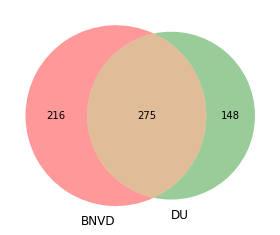

In [11]:
venn2((set(donnees_bnvd.substance), set(donnees_DU.substance)),
     set_labels=("BNVD", "DU"))

## Recherche d'autres correspondances
Recherche manuelle, tri sur la quantité

In [12]:
bnvd_only = set(donnees_bnvd.substance).difference(set(donnees_DU.substance))
du_only = set(donnees_DU.substance).difference(set(donnees_bnvd.substance))

In [13]:
bnvd_only

{'(z)-8-dodecenol',
 '(z)-9-dodecenylacetate',
 '1 iso thiazolinon chloromethyl',
 '1,5-diaminopentane',
 '1-dodecanol',
 '1-methylcyclopropene (1-mcp)',
 '1-tetradecanol',
 '2 phenyl-phenol',
 '2,4-d',
 '2,4-mcpa',
 '2,4-mcpb',
 '6-benzyladenine',
 "acetate d'ammonium",
 'acetate de e-8-dodecenyle',
 'acetate de z-8-dodecenyle',
 'acide acetique',
 'acide alpha naphtylacetique (ana)',
 'acide b-indole butyrique (aib)',
 'acide benzoique',
 'acide blue 9',
 'acide decanoique',
 'acide formique',
 'acide gibberellique',
 'acide hydroxyacetique',
 'acide malique',
 'acide octanoique',
 'acide oleique',
 'acide pelargonique',
 'acide peracetique',
 'acide propionique',
 'acide sorbique',
 'acide sulfamique',
 'adoxophyes orana granulovirus',
 'alcool ethylique',
 'alcool isodecylique',
 'alcool isopropylique',
 'alcools terpeniques',
 'alpha naphtyl acetamide (nad)',
 'alpha-chloralose',
 'alphachloralose',
 'alphamethrine',
 'amine grasse de suif ethoxylee',
 'amitrole',
 'ampelomyces qu

In [14]:
du_only

{'1-decanol',
 '2,4-d (ester amylique)',
 '2,4-d (ester de butyl glycol)',
 '2,4-d (ester ethylique)',
 '2,4-d (ester isobutylique)',
 "2,4-d (sel d'amine)",
 '2,4-d (sel de dimethylamine)',
 '2,4-d (sel de tri isopropanol amine)',
 '2,4-db (sel de sodium)',
 '2,4-dp (ester de butylglycol)',
 '2,4-mcpa (ester amylique)',
 '2,4-mcpa (ester de 2-ethylhexyl)',
 "2,4-mcpa (sel d'amine)",
 '2,4-mcpa (sel de dimethylamine)',
 '2,4-mcpa (sel de potassium)',
 "2,4-mcpa (sels d'amine et de potassium)",
 '2,4-mcpa (sels de sodium et de potassium)',
 '2,4-mcpb (sel de sodium)',
 'acide alpha-naphtylacetique',
 'acide mcpp',
 'acide phosphorique',
 'alachlore',
 'alcools gras',
 'alpha-cypermethrine',
 'alpha-naphtyl acetamide',
 'asulame (sel de sodium)',
 'atrazine',
 'benfuracarbe',
 'benthiavalicarbe isopropyl',
 'bore',
 'bromoxynil (ester octanoique)',
 'bromoxynil (octanoate )',
 'bromoxynil phenol',
 'bromure de methyle',
 'butraline',
 'carbendazime',
 'chlormephos',
 'chlormequat',
 'chl

En regardant rapidement à la main, on peut en retrouver quelques uns :
- 2,4-d
- 2,4-mcpa
- 2,4-mcpb
- etc
Quand il y a plusieurs correspondances dans la base DU, c'est qu'il s'agit de molécules de la même famille. On peut envisager de garder uniquement celle qui a la DU la plus élevée pour le calcul du NODU par exemple.

In [15]:
bnvd_groupe_substance = donnees_bnvd.groupby(by='substance').sum()
df_bnvd_only = pd.DataFrame(columns=['substance','quantite'])
for s in bnvd_only:
    qte = bnvd_groupe_substance[bnvd_groupe_substance.index==s]['quantite_substance'].iloc[0]
    df_bnvd_only = df_bnvd_only.append({'substance':s,'quantite':qte},ignore_index=True)

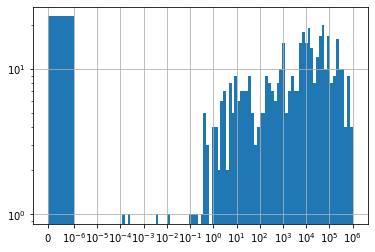

In [16]:
bnvd_groupe_substance.quantite_substance.fillna(0).hist(bins=[0]+list(np.logspace(-6,6, 100)))
plt.xscale("symlog", linthresh=1e-6)
plt.yscale("log")

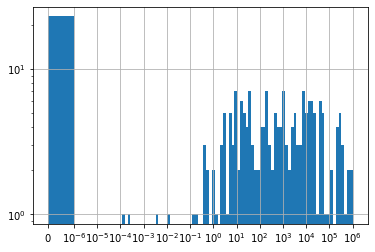

In [17]:
df_bnvd_only.quantite.fillna(0).hist(bins=[0]+list(np.logspace(-6,6, 100)))
plt.xscale("symlog", linthresh=1e-6)
plt.yscale("log")

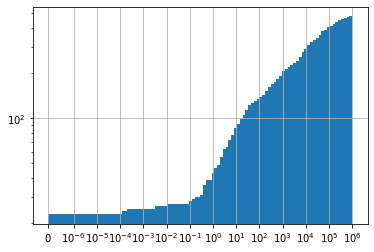

In [18]:
bnvd_groupe_substance.quantite_substance.fillna(0).hist(cumulative=True, bins=[0]+list(np.logspace(-6,6, 100)))
plt.xscale("symlog", linthresh=1e-6)
plt.yscale("log")

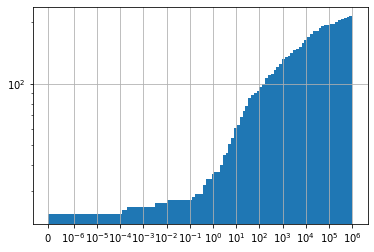

In [19]:
df_bnvd_only.quantite.fillna(0).hist(cumulative=True, bins=[0]+list(np.logspace(-6,6, 100)))
plt.xscale("symlog", linthresh=1e-6)
plt.yscale("log")

In [20]:
print((len(bnvd_groupe_substance),len(df_bnvd_only)))
print((bnvd_groupe_substance.quantite_substance.mean(),df_bnvd_only.quantite.mean()))
print((bnvd_groupe_substance.quantite_substance.std(),df_bnvd_only.quantite.std()))
print((bnvd_groupe_substance.quantite_substance.max(),df_bnvd_only.quantite.max()))

(491, 216)
(133297.62356104684, 78784.0720051528)
(551678.3873410759, 467991.6257733392)
(7809485.752833001, 6308132.200789999)


A regarder un peu plus en détail, mais à première vue les substances qu'on ne retrouve pas dans la base DU ne sont pas achetées en quantité faible (donc on ne peut pas les négliger).

## Recherche sur les noms alternatifs
Utilisation de la base ANSES E-Phy qui propose des noms alternatifs pour chaque substance, histoire de voir si on trouve d'autres correspondances

In [21]:
substances_anses = pd.read_csv(r'./donnees/anses_e-phy/substance_active_v3_utf8.csv', sep=';')
substances_anses

Nom substance active  \
0                                 Isoxaflutole   
1                                   Bromoxynil   
2                                    Benalaxyl   
3     Coniothyrium minitans strain CON/M/91-08   
4                                  Propyzamide   
...                                        ...   
1291                                Tetradifon   
1292                               Carbendazim   
1293                               Thidiazuron   
1294                               Chlormephos   
1295                                 Guazatine   

                                             Numero CAS Etat d’autorisation  \
0                                           141112-29-0            INSCRITE   
1     1689-99-2 (bromoxynil octanoate) | 1689-84-5 |...        NON_INSCRITE   
2                                            71626-11-4        NON_INSCRITE   
3                                                   NaN            INSCRITE   
4                                            23950-58-5            INSCRITE   
...                                                 ...                 ...   
1291                                           116-29-0        NON_INSCRITE   
1292                                         10605-21-7        NON_INSCRITE   
1293                                                NaN        NON_INSCRITE   
1294                                         24934-91-6        NON_INSCRITE   
1295                                        115044-19-4        NON_INSCRITE   

                                                Variant  Unnamed: 4  
0                                          isoxaflutole         NaN  
1     bromoxynil | bromoxynil octanoate | bromoxynil...         NaN  
2                                             bénalaxyl         NaN  
3              Coniothyrium minitans Souche CON/M/91-08         NaN  
4                                           propyzamide         NaN  
...                                                 ...         ...  
1291                                         tetradifon         NaN  
1292                                       carbendazime         NaN  
1293                                        thidiazuron         NaN  
1294                                        chlorméphos         NaN  
1295                                          guazatine         NaN  

[1296 rows x 5 columns]

In [22]:
substances_variants = pd.DataFrame(columns=['substance','variant'])
for subst_anses in substances_anses['Nom substance active']:
    info_subst_anses = substances_anses[substances_anses['Nom substance active']==subst_anses]
    
    variants = info_subst_anses['Variant'].values[0].split(' | ')
    for var in variants:
        substances_variants = substances_variants.append({'substance':subst_anses,'variant':var}, ignore_index=True)

In [23]:
substances_variants

substance                           variant
0     Isoxaflutole                      isoxaflutole
1       Bromoxynil                        bromoxynil
2       Bromoxynil              bromoxynil octanoate
3       Bromoxynil               bromoxynil butyrate
4       Bromoxynil  bromoxil (octanoate, heptanoate)
...            ...                               ...
1733    Tetradifon                        tetradifon
1734   Carbendazim                      carbendazime
1735   Thidiazuron                       thidiazuron
1736   Chlormephos                       chlorméphos
1737     Guazatine                         guazatine

[1738 rows x 2 columns]

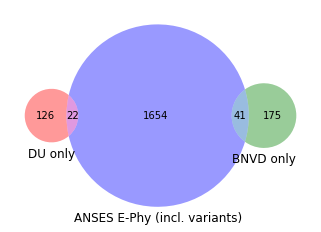

In [24]:
venn3((du_only, bnvd_only, set(substances_variants.variant)),
     set_labels=("DU only", "BNVD only", "ANSES E-Phy (incl. variants)"))

Il y a bien des correspondances, mais a priori pas de nouvelles correspondances entre DU et BNVD. Ce n'est pas surprenant à ce stade, il faut vérifier si ces correspondances sur les noms alternatifs se réfèrent à la même substances ou pas.

In [25]:
BNVD_et_ANSES = bnvd_only & set(substances_variants.variant)
DU_et_ANSES = du_only & set(substances_variants.variant)

In [26]:
DU_et_ANSES

{'acide phosphorique',
 'alachlore',
 'atrazine',
 'benthiavalicarbe isopropyl',
 'bromoxynil phenol',
 'butraline',
 'carbendazime',
 'chloropicrine',
 'cuivre',
 'di-1-p menthene',
 'dicamba acide',
 'diniconazole',
 'dioctyl sulfosuccinate de sodium',
 'endosulfan',
 'ferbame',
 'fluquinconazole',
 'hexazinone',
 'procymidone',
 'propachlore',
 'propanil',
 'quinalphos',
 'sulfate de cuivre tribasique'}

In [27]:
BNVD_et_ANSES

{'acide formique',
 'acide propionique',
 'anthraquinone',
 'asulame',
 'brodifacoum',
 'bromoxynil octanoate',
 'carboxine',
 'chlorophacinone',
 'chlorure de benzalkonium',
 'chlorure de choline',
 'cire',
 "cire d'abeille",
 'cloquintocet-mexyl',
 'cyazofamide',
 'cyprosulfamide',
 'farine de sang',
 'flonicamide',
 'florasulame',
 'flupyrsulfuron-methyl',
 'flutolanil',
 'gomme manille',
 "huile d'os",
 'huile de colza',
 'huile de poisson',
 'ioxynil octanoate',
 'ipconazole',
 'kaolin',
 'lambda-cyhalothrine',
 'laminarine',
 'lauryl sulfate de sodium',
 'phosphate ferrique',
 'phosphonate de disodium',
 'piclorame',
 'poivre',
 'polysulfure de calcium',
 'prohexadione-calcium',
 'propoxycarbazone sodium',
 "sulfate d'ammonium",
 "thiocyanate d'ammonium",
 'triazoxide',
 'triticonazole'}

In [28]:
nom_origine_BNVD_et_ANSES = set()
for s in BNVD_et_ANSES:
    nom_origine_BNVD_et_ANSES.add((substances_variants[substances_variants['variant']==s]['substance'].iloc[0]))

nom_origine_DU_et_ANSES = set()
for s in DU_et_ANSES:
    nom_origine_DU_et_ANSES.add((substances_variants[substances_variants['variant']==s]['substance'].iloc[0]))

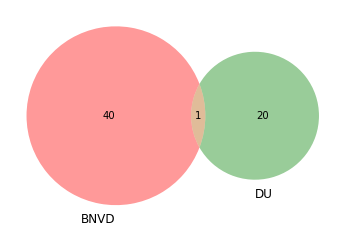

In [29]:
venn2((nom_origine_BNVD_et_ANSES, nom_origine_DU_et_ANSES),
     set_labels=("BNVD", "DU"))

On a un gagnant... pas hyper efficace...

In [30]:
gagnant = nom_origine_BNVD_et_ANSES & nom_origine_DU_et_ANSES
gagnant

{'Bromoxynil'}

## Merge des deux datasets

In [31]:
dataset_bnvd = donnees_bnvd[['substance','quantite_substance']].groupby(by='substance').sum()

joined_data = pd.merge(donnees_DU, dataset_bnvd, on='substance')
joined_data

substance        2011        2012        2013        2014  \
0    1,3-dichloropropene  376.344736  377.957746  376.113422  474.612613   
1                 2,4-db    1.800000    1.800000    1.800000    1.800000   
2             abamectine    0.018304    0.018313    0.018496    0.018530   
3            acetochlore    1.835000    1.835000    1.835000    1.835000   
4            acequinocyl    0.295200    0.295200    0.295200    0.295200   
..                   ...         ...         ...         ...         ...   
270        tritosulfuron    0.050018    0.050018    0.050017    0.050017   
271         valifenalate    0.125172    0.125070    0.125238    0.125445   
272    zetacypermethrine    0.020139    0.020211    0.043596    0.042790   
273               zirame    1.900000    1.900000    1.900000    1.900000   
274             zoxamide    0.127485    0.127386    0.127556    0.148640   

           2015  quantite_substance  
0    475.115093       346301.029600  
1      1.800000        22761.000000  
2      0.018533          674.967614  
3      1.835000          334.000000  
4      0.295200         1069.690000  
..          ...                 ...  
270    0.050018        12699.918650  
271    0.125444         1590.852600  
272    0.041527        11793.534000  
273    1.900000        24544.836000  
274    0.148650        30656.957337  

[275 rows x 7 columns]

## Calcul NODU 

In [32]:
joined_data['NODU'] = joined_data['quantite_substance'] / joined_data['2015']
joined_data

substance        2011        2012        2013        2014  \
0    1,3-dichloropropene  376.344736  377.957746  376.113422  474.612613   
1                 2,4-db    1.800000    1.800000    1.800000    1.800000   
2             abamectine    0.018304    0.018313    0.018496    0.018530   
3            acetochlore    1.835000    1.835000    1.835000    1.835000   
4            acequinocyl    0.295200    0.295200    0.295200    0.295200   
..                   ...         ...         ...         ...         ...   
270        tritosulfuron    0.050018    0.050018    0.050017    0.050017   
271         valifenalate    0.125172    0.125070    0.125238    0.125445   
272    zetacypermethrine    0.020139    0.020211    0.043596    0.042790   
273               zirame    1.900000    1.900000    1.900000    1.900000   
274             zoxamide    0.127485    0.127386    0.127556    0.148640   

           2015  quantite_substance           NODU  
0    475.115093       346301.029600     728.878191  
1      1.800000        22761.000000   12645.000000  
2      0.018533          674.967614   36419.770895  
3      1.835000          334.000000     182.016349  
4      0.295200         1069.690000    3623.611111  
..          ...                 ...            ...  
270    0.050018        12699.918650  253906.966492  
271    0.125444         1590.852600   12681.775135  
272    0.041527        11793.534000  283996.773184  
273    1.900000        24544.836000   12918.334737  
274    0.148650        30656.957337  206235.838123  

[275 rows x 8 columns]

In [33]:
joined_data.sum()

substance             1,3-dichloropropene2,4-dbabamectineacetochlore...
2011                                                        2081.543354
2012                                                        2081.361723
2013                                                        2075.782198
2014                                                        1991.907271
2015                                                        1989.990901
quantite_substance                                      48431773.615361
NODU                                                    91141709.829878
dtype: object